In [55]:
import pandas as pd

In [56]:
df=pd.read_csv("C:\\Users\\sadin\\OneDrive\\Desktop\\booking_cancellation\\data\\hotel_bookings.csv")

## Data Preprocessing

In [57]:
df.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [58]:
df.shape

(119390, 33)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [60]:
df.duplicated().any()

False

In [61]:
df.isnull().sum()

index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [62]:
df = df.drop(['company'], axis=1) #due to 94%-95% missing values

In [63]:
df["agent"].nunique() # high cardinality column - many unique values
                        #can leads to overfitting

333

In [64]:
(df["agent"].value_counts()==1).sum() # there 50 unique agent IDs out of 333

50

In [65]:
df = df.drop(['agent'], axis=1)

In [66]:
df = df.drop(['reservation_status_date'], axis=1)

In [67]:
#summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,119390.0,59694.500000,34465.068657,0.00,29847.25,59694.500,89541.75,119389.0
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.00,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.00,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.00,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.00,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.00,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.00,10.0


In [68]:
#summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
(df[df["reservation_status"] == "Canceled"]["is_canceled"] == 1).all() 

True

In [71]:
(df[df["reservation_status"] == "Check-Out"]["is_canceled"] == 0).all()

True

In [72]:
(df[df["reservation_status"] == "No-Show"]["is_canceled"] == 1).all()

True

In [73]:
# from above details, we can say that both reservation_status and is_cancelled columns have same information. So we can drop 
#reservation_status column

df = df.drop(['reservation_status'], axis=1)

In [74]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [75]:
#arrival_date_year has only 3 yrs which does not provide much information. therefore arrival_date_year is dropped.
df = df.drop(['arrival_date_year'], axis=1)

In [76]:
df = df.drop(['index'], axis=1)

In [77]:
len(df.columns)

27

In [78]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

(array([1.10796e+05, 4.86100e+03, 3.65200e+03, 7.60000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

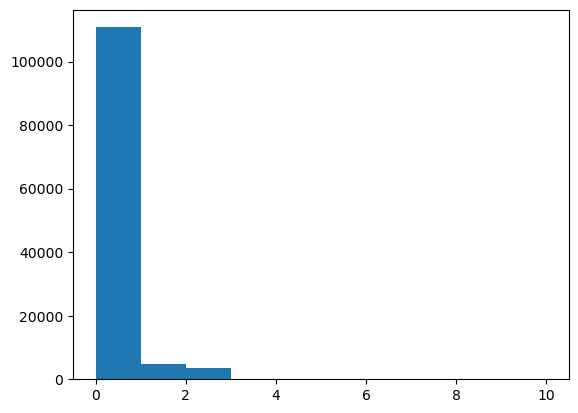

In [79]:
plt.hist(df["children"]) # skewed distribution. mode imputation is used for children column

In [80]:
df['children']=df['children'].fillna(df['children'].mode()[0])

In [81]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

In [82]:
#HANDELING MISSING VALUES IN COUNTRY COLUMN

df["country"].nunique()

177

In [83]:
#0.41% of missing values are there for country column
# Replace missing values with "Unknown"
df['country'] = df['country'].fillna("Unknown")

In [84]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [85]:
df["country"].nunique()

178

In [86]:
df['country'].unique() #ISO Alpha-3 country codes

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KN

In [87]:
import pycountry
import pycountry_convert as pc

# Convert 3-letter code to country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return "Unknown"

# Convert country name to continent
def get_continent(code):
    country_name = get_country_name(code)
    if country_name == "Unknown":
        return "Unknown"
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return "Unknown"

# Apply to your df
df['continent'] = df['country'].apply(get_continent)
df = df.drop(['country'], axis=1) 

In [88]:
df['continent'] .nunique()

7

In [89]:
df['continent'] .unique()

array(['Europe', 'North America', 'Unknown', 'Asia', 'South America',
       'Oceania', 'Africa'], dtype=object)

In [90]:
df.shape

(119390, 27)

In [91]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'continent'],
      dtype='object')

In [92]:
df['room_mismatch'] = (df['reserved_room_type'] != df['assigned_room_type'])
# Then drop original columns
df = df.drop(columns=['reserved_room_type'])

In [93]:
df = df.drop(columns=['assigned_room_type'])

In [94]:
df['room_mismatch'] = df['room_mismatch'].map({True: 1, False: 0})

In [95]:
df.shape

(119390, 26)

In [96]:
#adr - The average daily rate (price per room) for the booking
#cannot have negative values
df[df['adr'] < 0] 

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,continent,room_mismatch
14969,Resort Hotel,0,195,March,10,5,4,6,2,0.0,...,2,2,No Deposit,0,Transient-Party,-6.38,0,0,Europe,1


In [97]:
#only one negative adr value. impute with median make it robust to outliers
df.loc[df['adr']<0,'adr'] = df['adr'].median()

In [98]:
# Remove rows with 0 adults
df = df[df['adults'] != 0]

In [99]:
df.shape # newest dataframe

(118987, 26)

In [100]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'continent',
       'room_mismatch'],
      dtype='object')

In [101]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_canceled'])  
y = df['is_canceled']                

# 80% train, 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
train_df = pd.concat([X_train, y_train], axis=1)

C:\Users\sadin\AppData\Local\Temp\ipykernel_2104\1625218666.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


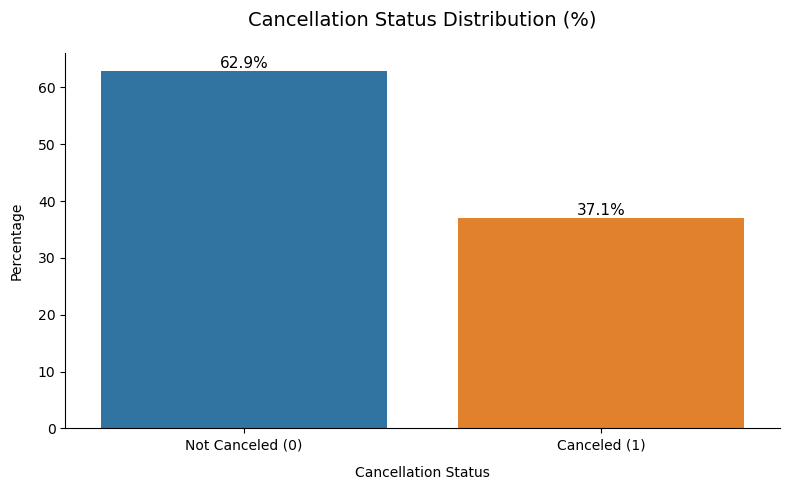

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

cancel_percent = train_df['is_canceled'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=cancel_percent.index, 
    y=cancel_percent.values,
    palette=['#1f77b4', '#ff7f0e']
)

plt.title('Cancellation Status Distribution (%)', pad=20, fontsize=14)
plt.xlabel('Cancellation Status', labelpad=10)
plt.ylabel('Percentage', labelpad=10)
plt.xticks(ticks=[0, 1], labels=['Not Canceled (0)', 'Canceled (1)'])

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points',
        fontsize=11
    )

sns.despine()
plt.tight_layout()
plt.show()

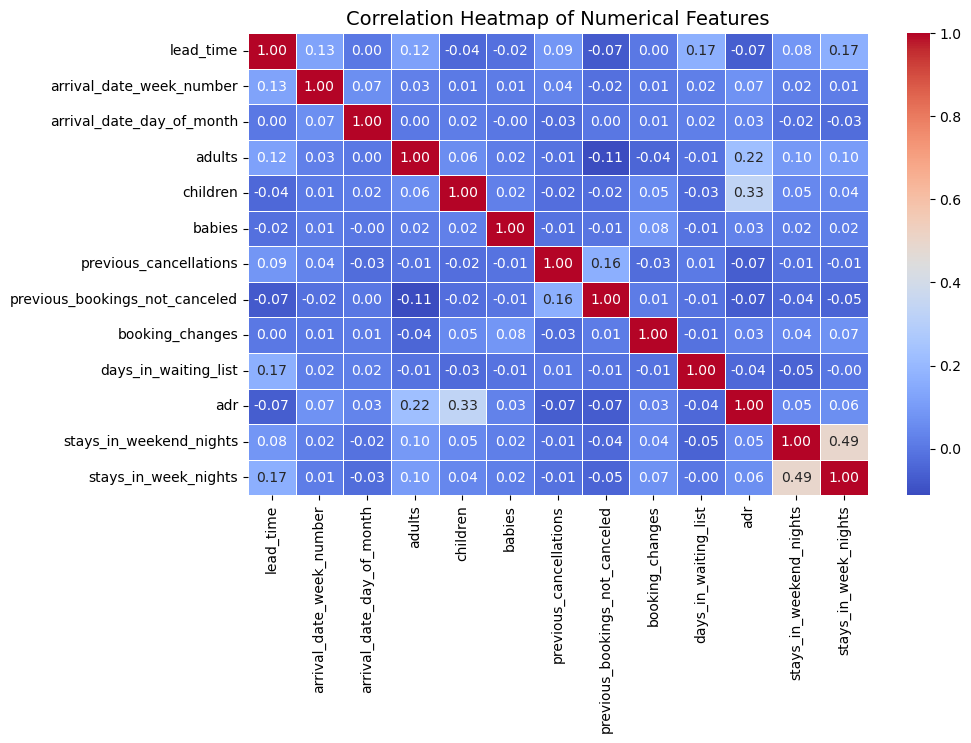

In [104]:
numeric_features = [
    'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
    'adults','children','babies',
    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
    'days_in_waiting_list', 'adr','stays_in_weekend_nights', 'stays_in_week_nights'
]


# Compute the correlation matrix
correlation_matrix = train_df[numeric_features].corr()

# Set up the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)

plt.show()

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train_df[numeric_features]

# Adding a constant column for VIF calculation
X = add_constant(X)

# Computing VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                           Feature        VIF
0                            const  21.357800
1                        lead_time   1.115364
2         arrival_date_week_number   1.029512
3        arrival_date_day_of_month   1.007479
4                           adults   1.093462
5                         children   1.128408
6                           babies   1.009190
7           previous_cancellations   1.043227
8   previous_bookings_not_canceled   1.049586
9                  booking_changes   1.018885
10            days_in_waiting_list   1.035798
11                             adr   1.205833
12         stays_in_weekend_nights   1.331395
13            stays_in_week_nights   1.362103


## Cluster Analysis

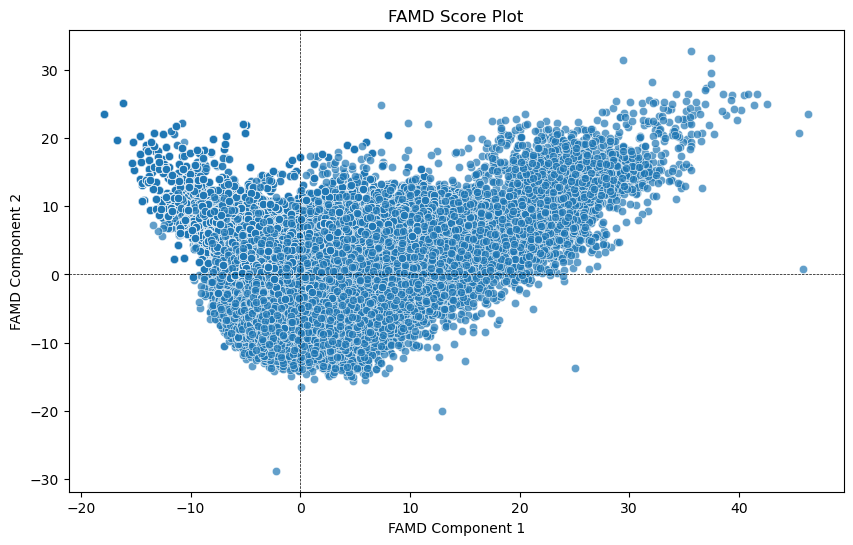

In [111]:
import prince 

famd = prince.FAMD(
    n_components=2, 
    n_iter=10, 
    random_state=42
)

famd.fit(df)

# Getting transformed factor scores
famd_scores = famd.transform(df)

# Plotting FAMD score plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=famd_scores[0], y=famd_scores[1], alpha=0.7)
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Score Plot")
plt.show()

In [112]:
import prince
import pandas as pd

# Applying FAMD
famd = prince.FAMD(n_components=10)  # Adjust n_components as needed
famd.fit(train_df)

# Get eigenvalues
eigenvalues = famd.eigenvalues_

# Calculate percentage of variance explained
variance_explained_ratio = eigenvalues / eigenvalues.sum() * 100

for i, ratio in enumerate(variance_explained_ratio, 1):
    print(f"Component {i}: {ratio:.2f}%")

Component 1: 15.89%
Component 2: 13.81%
Component 3: 9.86%
Component 4: 9.25%
Component 5: 9.09%
Component 6: 8.61%
Component 7: 8.54%
Component 8: 8.52%
Component 9: 8.32%
Component 10: 8.12%


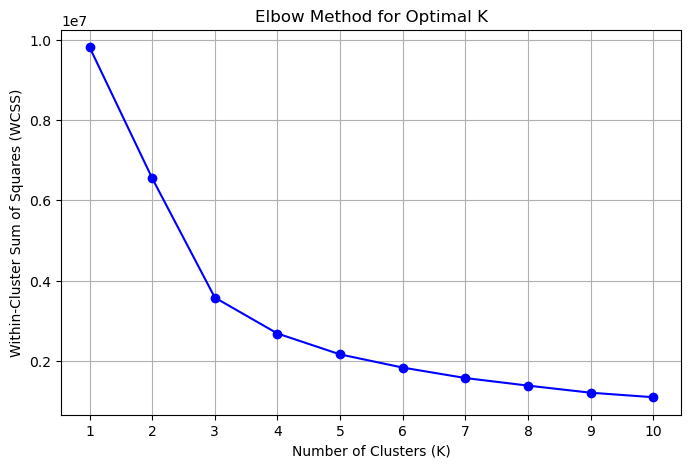

In [113]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute Within-Cluster Sum of Squares (WCSS) for different K values
wcss = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(famd_scores)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to cluster centers

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid(True)
plt.show()

Silhouette Score for 2 clusters: 0.4331
Silhouette Score for 3 clusters: 0.4978
Silhouette Score for 4 clusters: 0.4062
Silhouette Score for 5 clusters: 0.3615
Silhouette Score for 6 clusters: 0.3648
Silhouette Score for 7 clusters: 0.3419
Silhouette Score for 8 clusters: 0.3491
Silhouette Score for 9 clusters: 0.3525


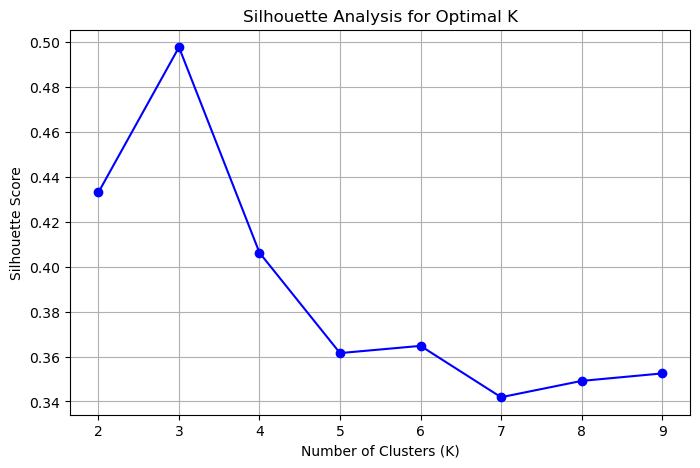


Optimal number of clusters: 3


In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 10)  # Trying clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(famd_scores)
    silhouette_avg = silhouette_score(famd_scores, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.grid()
plt.show()

# Best K based on highest Silhouette Score
optimal_k = K[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_k}")

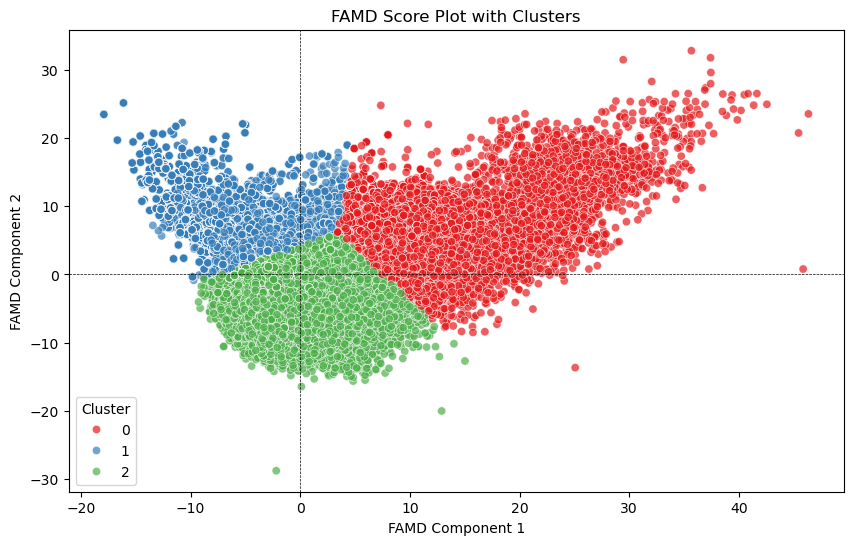

In [115]:
from sklearn.cluster import KMeans

optimal_k = 3  # based on elbow method and silhouette score

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(famd_scores)

# Add cluster labels to FAMD scores
famd_scores['Cluster'] = cluster_labels

# Plot FAMD Score Plot with Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=famd_scores[0], y=famd_scores[1], hue=famd_scores['Cluster'], palette="Set1", alpha=0.7)
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Score Plot with Clusters")
plt.legend(title="Cluster")
plt.show()